In [8]:
import scipy.optimize as optimize
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

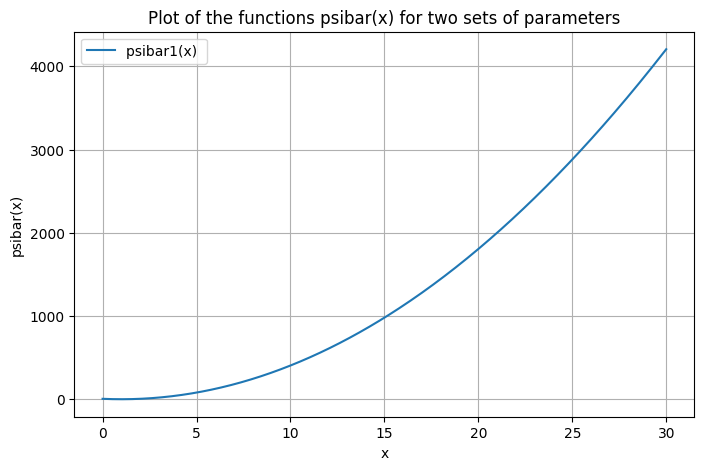

In [14]:
acoef = np.array([20])
bcoef = np.array([0.5])

def psibar(x):
    return np.sum(10*(x-1)**2/2.)

x_values = np.linspace(0, 30, 400)
y_values1 = np.array([psibar(x) for x in x_values])
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values1, label=f'psibar1(x) ')
plt.title('Plot of the functions psibar(x) for two sets of parameters')
plt.xlabel('x')
plt.ylabel('psibar(x)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
1*(x-10)**2/2

4.5

In [7]:
test = np.array([ 60551.75555556,  56507.64516129,  64140.27867384,  66236.9781746 ,
        65055.37455197,  58071.84139785,  58350.37222222,  64703.75985663,
        57558.37365591,  65026.03148148,  61303.44982079,  58415.02685185,
        61944.44593333,  57807.321     ,  65615.50508333,  67760.42867262,
        66551.64816667,  59407.49375   ,  59692.43078333,  66191.94633333,
        58882.21625   ,  66521.63020556,  62713.42916667,  59758.57246944,
        63369.1681898 ,  59136.889383  ,  67124.66170025,  69318.91853209,
        68082.3360745 ,  60773.86610625,  61065.35669135,  67714.361099  ,
        60236.50722375,  68051.62770028,  64155.8380375 ,  61133.01963624,
        64826.65905817,  60497.03783881,  68668.52891936,  70913.25365833,
        69648.22980421,  62171.66502669,  62469.85989525,  69271.79140428,
        61621.9468899 ,  69616.81513739,  65631.42231236,  62539.07908788,
        66317.6722165 ,  61888.4697091 ,  70247.9050845 ,  72544.25849247,
        71250.13908971,  63601.61332231,  63906.66667284,  70865.04260658,
        63039.25166836,  71218.00188555,  67140.94502555,  63977.4779069 ,
        67842.97867748,  63311.90451241,  71863.60690144,  74212.7764378 ,
        72888.89228877,  65064.45042872,  65376.52000632,  72494.93858653,
        64489.15445674,  72856.01592892,  68685.18676113,  65448.95989875,
        69403.36718706,  64768.0783162 ,  73516.46986018,  75919.67029586,
        74565.33681142,  66560.93278858,  66880.17996646,  74162.32217402,
        65972.40500924,  74531.70429528,  70264.94605664,  66954.28597643,
        70999.64463237,  66257.74411747,  75207.34866696,  77665.82271267,
        76280.33955808,  68091.83424272,  68418.42410569,  75868.05558402,
        67489.77032445,  76245.93349407,  71881.03981594,  68494.23455388,
        72632.63645891,  67781.67223217,  76937.1176863 ,  79452.13663506,
        78034.78736791,  69657.9464303 ,  69992.04786012,  77613.02086245,
        69042.03504192,  77999.58996444,  73534.30373171,  70069.60194862,
        74303.18709747,  69340.65069351,  78706.67139309,  81279.53577767,
        79829.58747738,  71260.0791982 ,  71601.8649609 ,  79398.12034229,
        70630.00184788,  79793.58053362,  75225.59271754,  71681.20279344,
        76012.16040071,  70935.48565946,  80516.92483513,  83148.96510055,
        81665.66798936,  72899.06101976,  73248.70785501,  81224.27711016,
        72254.49189038,  81628.83288589,  76955.78135004,  73329.87045769,
        77760.44008992,  72567.00182963,  82368.81410634,  85061.39129787,
        83543.97835311,  74575.73942321,  74933.42813567,  83092.43548369,
        73916.34520386,  83506.29604227,  78725.76432109,  75016.45747822,
        79548.93021199,  74236.04287171,  84263.29683078,  87017.80329772,
        85465.48985523,  76290.98142994,  76656.89698279,  85003.56149982,
        75616.42114355,  85426.94085124,  80536.45690048,  76741.83600022,
        81378.55560687,  75943.47185776,  86201.35265789,  89019.21277357,
        87431.1961219 ,  78045.67400283,  78420.0056134 ,  86958.64341431,
        77355.59882985,  87391.76049082,  82388.79540919,  78506.89822822,
        83250.26238583,  77690.17171049,  88183.98376902,  91066.65466736,
        89442.11363271,  79840.7245049 ,  80223.6657425 ,  88958.69221284,
        79134.77760294,  89401.77098211,  84283.7377036 ,  80312.55688747,
        85165.0184207 ,  79477.04565983,  90212.21539571,  93161.18772471,
        91499.28224626,  81677.06116851,  82068.81005458,  91004.74213374,
        80954.8774878 ,  91458.0117147 ,  86222.26367078,  82159.74569588,
        87123.81384438,  81305.01771001,  92287.09634981,  95303.89504237,
        93603.76573792,  83555.63357539,  83956.39268584,  93097.85120282,
        82816.83967002,  93561.54598413,  88205.37573521,  84049.41984689,
        89127.6615628 ,  83175.03311734,  94409.69956586,  97495.88462835,
        95756.65234989,  85477.41314762,  85887.38971761,  95239.10178048,
        84721.62698243,  95713.46154177,  90234.09937712,  85982.55650337,
        91177.59777874,  85088.05887903,  96581.12265587,  99738.2899748 ,
        97959.05535394,  87443.39365002,  87862.79968112,  97429.60112143,
        86670.22440303,  97914.87115723,  92309.4836628 ,  87960.15530294,
        93274.68252765,  87045.08423325,  98802.48847695, 102032.27064422,
       100212.11362708,  89454.59170397,  89883.64407378,  99670.48194722,
        88663.6395643 , 100166.91319385,  94432.60178704,  89983.23887491])/1000

test


array([ 60.55175556,  56.50764516,  64.14027867,  66.23697817,
        65.05537455,  58.0718414 ,  58.35037222,  64.70375986,
        57.55837366,  65.02603148,  61.30344982,  58.41502685,
        61.94444593,  57.807321  ,  65.61550508,  67.76042867,
        66.55164817,  59.40749375,  59.69243078,  66.19194633,
        58.88221625,  66.52163021,  62.71342917,  59.75857247,
        63.36916819,  59.13688938,  67.1246617 ,  69.31891853,
        68.08233607,  60.77386611,  61.06535669,  67.7143611 ,
        60.23650722,  68.0516277 ,  64.15583804,  61.13301964,
        64.82665906,  60.49703784,  68.66852892,  70.91325366,
        69.6482298 ,  62.17166503,  62.4698599 ,  69.2717914 ,
        61.62194689,  69.61681514,  65.63142231,  62.53907909,
        66.31767222,  61.88846971,  70.24790508,  72.54425849,
        71.25013909,  63.60161332,  63.90666667,  70.86504261,
        63.03925167,  71.21800189,  67.14094503,  63.97747791,
        67.84297868,  63.31190451,  71.8636069 ,  74.21

In [2]:
# Datasets

folder_path = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 01 - DIPU\Estimation\wind\clusterOnshore"
file_prefix = "cluster_"

csv_files = [file for file in os.listdir(folder_path) if file.startswith(file_prefix)]
dataframes = []
zero_count = 0

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, index_col=0)
    data.drop(data.tail(1).index, inplace=True)

    # Remove zeros from the dataframe
    data = data[data != 0]

    # Count the number of zeros removed
    zero_count += (data == 0).sum().sum()

    dataframes.append(data)


In [3]:
def neg_log_likelihood(params, data):
    alpha, beta = params
    return -np.sum(stats.beta.logpdf(data, alpha, beta))

In [4]:
# Create an empty dataframe to store the results
result_df = pd.DataFrame(columns=['Dataset', 'Alpha', 'Beta'])

# Iterate over each dataframe
for idx, data in enumerate(dataframes):
    # Minimization
    bounds = [(0.01, 100), (0.01, 100)] # set bounds for alpha and beta
    result = optimize.minimize(neg_log_likelihood, [0.1, 0.1], args=(data,), bounds=bounds)
    alpha_mle, beta_mle = result.x

    # Create a temporary dataframe with the results
    temp_df = pd.DataFrame({'Dataset': [f'Dataset_{idx}'], 'Alpha': [alpha_mle], 'Beta': [beta_mle]})

    # Concatenate the temporary dataframe with the result dataframe
    result_df = pd.concat([result_df, temp_df], ignore_index=True)


# Print the final dataframe
print(result_df)

       Dataset     Alpha      Beta
0    Dataset_0  1.033401  2.781667
1    Dataset_1  0.100000  0.100000
2    Dataset_2  0.995456  3.884933
3    Dataset_3  0.100000  0.100000
4    Dataset_4  0.100000  0.100000
5    Dataset_5  0.100000  0.100000
6    Dataset_6  1.003867  3.867980
7    Dataset_7  0.100000  0.100000
8    Dataset_8  0.100000  0.100000
9    Dataset_9  0.100000  0.100000
10  Dataset_10  1.044452  1.488646
11  Dataset_11  0.100000  0.100000
12  Dataset_12  0.100000  0.100000
13  Dataset_13  0.100000  0.100000
14  Dataset_14  0.100000  0.100000
15  Dataset_15  0.100000  0.100000
16  Dataset_16  0.100000  0.100000
17  Dataset_17  0.100000  0.100000
18  Dataset_18  0.100000  0.100000
19  Dataset_19  1.019030  1.575608
20  Dataset_20  0.100000  0.100000
21  Dataset_21  0.100000  0.100000
22  Dataset_22  0.100000  0.100000
23  Dataset_23  0.100000  0.100000
24  Dataset_24  1.074297  3.057369
25  Dataset_25  1.000197  5.523226
26  Dataset_26  0.100000  0.100000
27  Dataset_27  1.07

In [5]:
# Create an empty dataframe to store the results
result_df = pd.DataFrame(columns=['Dataset', 'Alpha', 'Beta'])

# Define the folder path to save the PDF files
save_folder = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 02 - Mean Field\Estimation\Wind capacity factor"

# Iterate over each dataframe
for idx, data in enumerate(dataframes):
    # Remove zeros from the dataframe
    data = data[data != 0]

    # Define the bounds for alpha and beta
    bounds = [(0.01, 100), (0.01, 100)]

    # Perform differential evolution
    result = optimize.differential_evolution(neg_log_likelihood, bounds, args=(data,))
    alpha_mle, beta_mle = result.x

    # Create a temporary dataframe with the results
    temp_df = pd.DataFrame({'Dataset': [f'Dataset_{idx}'], 'Alpha': [alpha_mle], 'Beta': [beta_mle]})

    # Concatenate the temporary dataframe with the result dataframe
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

    # Plot the estimated distribution
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, alpha_mle, beta_mle)

    plt.plot(x, y)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'Dataset_{idx} - Estimated Distribution')
    plt.savefig(f'{save_folder}/Dataset_{idx}_distribution.pdf')
    plt.close()

# Print the final dataframe
print(result_df)

       Dataset      Alpha       Beta
0    Dataset_0   1.033403   2.781675
1    Dataset_1  45.722017  96.446003
2    Dataset_2   0.995456   3.884933
3    Dataset_3   5.336834  20.507501
4    Dataset_4   9.526821  11.295595
5    Dataset_5  23.125070  64.143078
6    Dataset_6   1.003867   3.867979
7    Dataset_7  68.797991  57.017934
8    Dataset_8  44.574042  97.569084
9    Dataset_9  22.359783  38.607490
10  Dataset_10   1.044451   1.488645
11  Dataset_11  60.650355  18.945196
12  Dataset_12  76.715590  39.675659
13  Dataset_13  85.818157  42.532584
14  Dataset_14  36.783022  91.914761
15  Dataset_15  79.516837  10.144954
16  Dataset_16  15.499649  35.024739
17  Dataset_17  38.477778  71.577363
18  Dataset_18  75.193557  34.212173
19  Dataset_19   1.019030   1.575609
20  Dataset_20  77.539741  78.136129
21  Dataset_21  11.558684  51.142564
22  Dataset_22  87.145351  74.306470
23  Dataset_23  57.138273  15.685532
24  Dataset_24   1.074297   3.057367
25  Dataset_25   1.000197   5.523224
2